# Script to evaluate the ML-Models

Setup (load automl-models.pickle)

In [4]:
import pickle
import csv

with open(r"../app/_meta.csv") as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  list_qualities = list()
  for line in csv_reader:
    list_qualities.append(line[0])
  list_qualities = list_qualities[1:]

with open(r"../app/automl.pkl", "rb") as input_file:
  automl = pickle.load(input_file)

### Inspect the score:

In [5]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 13, 'num_leaves': 16, 'min_child_samples': 5, 'learning_rate': 0.10208652042099983, 'log_max_bin': 4, 'colsample_bytree': 0.22250894882726385, 'reg_alpha': 0.06773184541058815, 'reg_lambda': 0.6364917072348221}
Best accuracy on validation data: 0.9078
Training duration of best run: 0.03407 s


Test with a random dataset:

In [6]:
import openml as oml
import pandas as pd

dataset = oml.datasets.get_dataset(12)

t = dict()

for quality in list_qualities:
  t[quality] = [dataset.qualities.get(quality)]
test_df = pd.DataFrame(t)
print(dict(zip(automl.classes_, automl.predict_proba(test_df)[0])))
print(automl.predict(test_df)[0])

{'ATM': 0.33244946930576386, 'AutoGluon': 0.03653372798431604, 'FLAML': 0.3807543566359782, 'H2O AutoML': 0.046558618179186294, 'Hyperopt-Sklearn': 0.07650011194626957, 'TPOT': 0.0507654906680126, 'TransmogrifAI': 0.03947650333921017, 'auto-sklearn': 0.03696172194126312}
FLAML


In [7]:
automl.classes_

array(['ATM', 'AutoGluon', 'FLAML', 'H2O AutoML', 'Hyperopt-Sklearn',
       'TPOT', 'TransmogrifAI', 'auto-sklearn'], dtype=object)

In [8]:
import lightgbm as lgb
import matplotlib.pyplot as plt

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_importance.html

In [ ]:
print(*automl.model.estimator.feature_name_, sep = "\n")

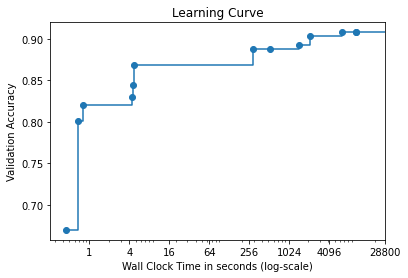

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from flaml.data import get_output_from_log
import matplotlib.ticker as ticker


time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename='logs/automl2022-09-13 14_03_26.970893.log', time_budget=8*60*60)

fig, ax = plt.subplots(1, 1)

ax.scatter(time_history, 1 - np.array(valid_loss_history))
time_history.append(8*60*60)
best_valid_loss_history.append(best_valid_loss_history[len(best_valid_loss_history)-1])
ax.step(time_history, 1 - np.array(best_valid_loss_history), where='post')

ax.set_xscale('log')
ax.set_xticks([1, 4, 16, 64, 256, 1024, 4096, 8*60*60])
ax.set_xlim(right=8*60*60)
ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time in seconds (log-scale)')
plt.ylabel('Validation Accuracy')

plt.savefig('graphs/multi-class-learning-curve.png', dpi=300, bbox_inches="tight")